In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [3]:
df=pd.read_csv('Facebook_Marketplace_data.csv')

In [4]:
df_clean=df.drop(columns=['Column1','Column2','Column3', 'Column4','status_id'])

In [5]:
df_clean['status_published'] = pd.to_datetime(df_clean['status_published'])
df_clean['hour'] = df_clean['status_published'].dt.hour
print("Average Reactions by Hour:")
df_clean.groupby('hour')['num_reactions'].mean().sort_values(ascending=False).head()

Average Reactions by Hour:


hour
19    442.368421
20    417.288136
17    384.000000
18    351.750000
15    341.666667
Name: num_reactions, dtype: float64

In [6]:
print("\nCorrelation Matrix:")
df_clean[['num_reactions', 'num_comments', 'num_shares']].corr()


Correlation Matrix:


,num_reactions,num_comments,num_shares
num_reactions,1.000000,0.150843,0.250723
num_comments,0.150843,1.000000,0.640637
num_shares,0.250723,0.640637,1.000000


In [7]:
print("\nPost Type Counts:")
print(df_clean['status_type'].value_counts())
print("\nAverage Metrics by Post Type:")
df_clean.groupby('status_type')[['num_reactions', 'num_comments', 'num_shares']].mean()


Post Type Counts:
status_type
photo     4288
video     2334
status     365
link        63
Name: count, dtype: int64

Average Metrics by Post Type:


,num_reactions,num_comments,num_shares
status_type,,,
link,370.142857,5.698413,4.396825
photo,181.290345,15.993470,2.553871
status,438.783562,36.238356,2.558904
video,283.409597,642.478149,115.679949


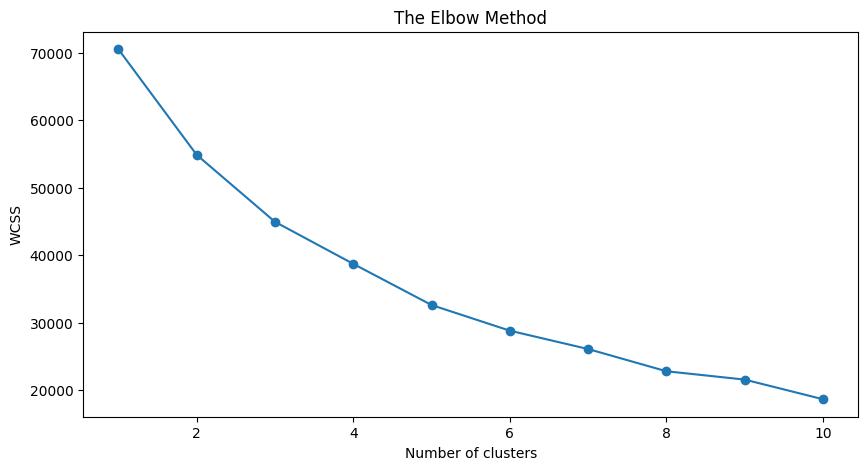


Clustering Complete!


In [ ]:
#K-Means Clustering
#Select features
features=['status_type', 'num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']
X =df_clean[features].copy()

#Encode status_type(Video/Photo to Numbers)
le =LabelEncoder()
X['status_type']= le.fit_transform(X['status_type'])

# Scale the data (Clustering is sensitive to scale!)
scaler=StandardScaler()
X_scaled= scaler.fit_transform(X)

# Elbow Method to find optimal K
wcss=[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot Elbow
plt.figure(figsize=(10,5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#Training Final Model with k=3
kmeans=KMeans(n_clusters=3, random_state=42)
df_clean['cluster']=kmeans.fit_predict(X_scaled)
print("\nClustering Complete!")